# **Graph analysis**

## Imports

In [125]:
import os
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
import numpy as np
import backboning_p3nx2.backboning as bb
import scipy.stats as stats
import powerlaw as pl
import forceatlas2

## Helper functions

In [103]:
def load_checkpoint(filename):
    if os.path.exists(filename):
        with open(filename, 'rb') as f:
            return pickle.load(f)
    return None

## Load data

In [104]:
G = pickle.load(open('graph_depth_2.pkl', 'rb'))

## Keep only the biggest connected component

In [105]:
print("Nodes before cleaning:", G.number_of_nodes())
G = G.subgraph(max(nx.connected_components(G), key=len)).copy()
print("Nodes after cleaning:", G.number_of_nodes())

Nodes before cleaning: 824
Nodes after cleaning: 815


## Graph information and statistics

In [106]:
# Calculate metrics
nodes = list(G.nodes())
degrees = [G.degree(node) for node in nodes]
popularity = [G.nodes[node]['popularity'] for node in nodes]

In [107]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_nodes, num_edges

(815, 6259)

In [108]:
# top 10 nodes by degree
top_degree = sorted(G.degree(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 performers by degree:")
for n, d in top_degree:
    print(f"{n}: {d}")

# top 10 most popular artists
node_content_popularity = [(node, G.nodes[node]['popularity']) for node in G.nodes()]
top_content_popularity = sorted(node_content_popularity, key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 performers by popularity:")
for n, p in top_content_popularity:
    print(f"{n}: {p} popularity")


Top 10 performers by degree:
Lil Wayne: 133
Future: 119
Ty Dolla $ign: 118
2 Chainz: 100
Kendrick Lamar: 97
Drake: 97
French Montana: 96
Young Thug: 94
Rick Ross: 94
Lil Baby: 89

Top 10 performers by popularity:
Taylor Swift: 100 popularity
Drake: 96 popularity
Bad Bunny: 96 popularity
The Weeknd: 94 popularity
Sabrina Carpenter: 92 popularity
Billie Eilish: 91 popularity
Justin Bieber: 91 popularity
Ariana Grande: 91 popularity
Rihanna: 91 popularity
Fuerza Regida: 90 popularity


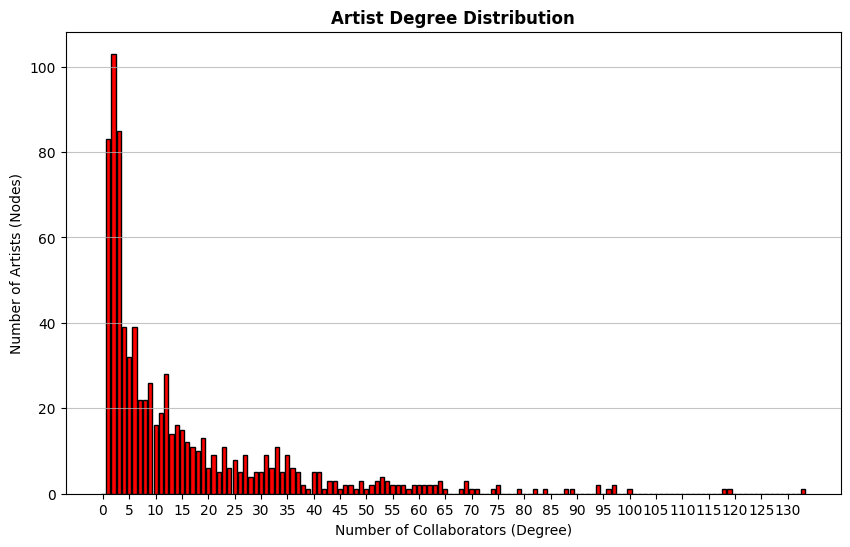

In [109]:
degree_counts = nx.degree_histogram(G)
degrees_range = range(len(degree_counts))

plt.figure(figsize=(10, 6))
plt.bar(degrees_range, degree_counts, color='red', edgecolor='black')
plt.title('Artist Degree Distribution', fontweight='bold')
plt.xlabel('Number of Collaborators (Degree)')
plt.ylabel('Number of Artists (Nodes)')
plt.xticks(range(0, len(degrees_range), 5))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [110]:
print("\nIn-Degree Statistics:")
print("Average:", np.mean(degrees))
print("Median:", np.median(degrees))
print("Mode:", stats.mode(degrees)[0])
print("Minimum:", np.min(degrees))
print("Maximum:", np.max(degrees))


In-Degree Statistics:
Average: 15.359509202453987
Median: 8.0
Mode: 2
Minimum: 1
Maximum: 133


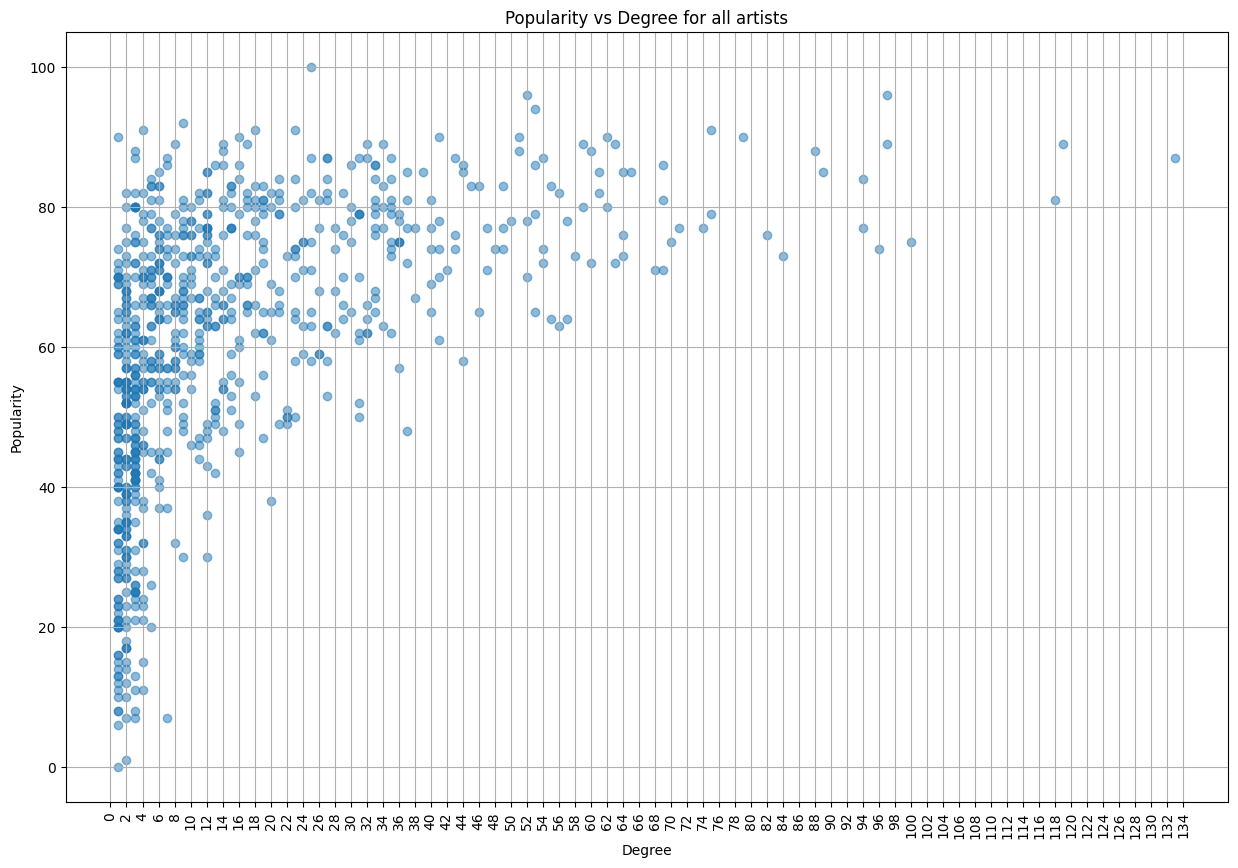

Spearman correlation between popularity and degree:
Correlation coefficient: 0.6418905922439765
P-value: 7.644703335190778e-96
------------------------------
The correlation between popularity and degree is statistically significant with significance level of 5%


In [111]:
# plot popularity vs degree
plt.figure(figsize=(15, 10))
plt.scatter(degrees, popularity, alpha=0.5)
plt.title('Popularity vs Degree for all artists')
plt.xlabel('Degree')
plt.ylabel('Popularity')
plt.grid(True)
plt.xticks(np.arange(0, max(degrees)+2, 2), rotation=90)
plt.show()

# calculate Spearman correlation for word count vs out degree
corr_out, p_out = stats.spearmanr(popularity, degrees)
print(f"Spearman correlation between popularity and degree:")
print(f"Correlation coefficient: {corr_out}")
print(f"P-value: {p_out}")
print("-" * 30)

# p-value: 5% significance level
alpha = 0.05
if p_out < alpha:
    print("The correlation between popularity and degree is statistically significant with significance level of 5%")
else:
    print("The correlation between popularity and degree is not statistically significant with significance level of 5%")

In [112]:
fit = pl.Fit(list(dict(G.degree()).values()))
print('Total degree exponent:', fit.alpha)

Calculating best minimal value for power law fit
Total degree exponent: 4.6748743862869215


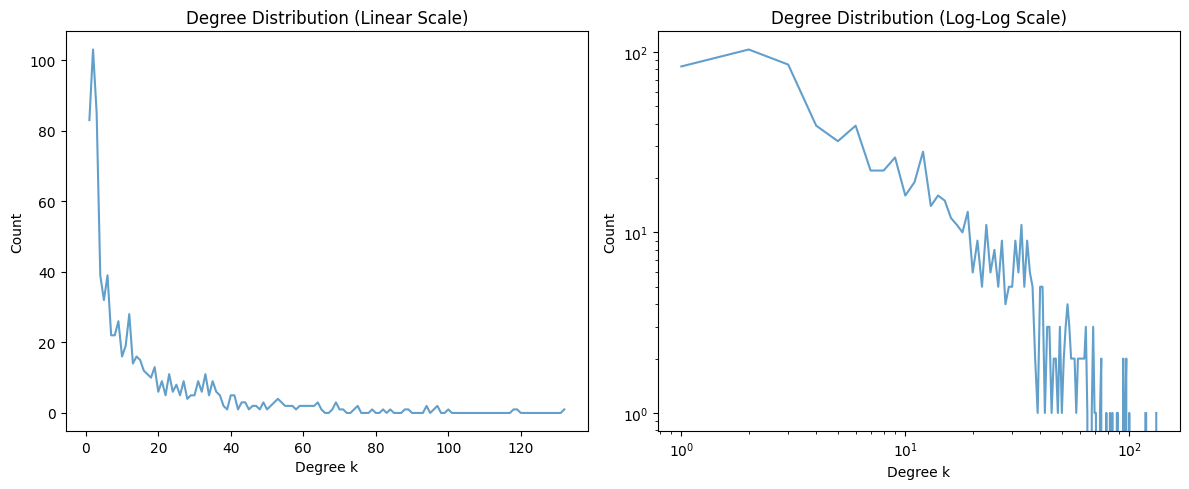

In [113]:
# bin the dirtubution with np.histgram and plot with linear and log-log axes
hist, bin_edges = np.histogram(list(dict(G.degree).values()), bins=range(1, max(dict(G.degree).values()) + 1))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(bin_edges[:-1], hist, alpha=0.7)
plt.xlabel('Degree k')
plt.ylabel('Count')
plt.title('Degree Distribution (Linear Scale)')

plt.subplot(1, 2, 2)
plt.plot(bin_edges[:-1], hist, alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree k')
plt.ylabel('Count')
plt.title('Degree Distribution (Log-Log Scale)')
plt.tight_layout()
plt.show()

In [114]:
# 10 most central characters degree centrality
degree_centrality = nx.degree_centrality(G)
top_10_central = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 most central characters by degree centrality:")
for character, centrality in top_10_central:
    print(f"{character}: {centrality:.4f}")

# 10 most central characters betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
top_10_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 most central characters by betweenness centrality:")
for character, centrality in top_10_betweenness:
    print(f"{character}: {centrality:.4f}")


# 10 most central characters eigenvector centrality (in and out degree)
eigenvector_centrality = nx.eigenvector_centrality(G)
top_10_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 most central characters by eigenvector centrality:")
for character, centrality in top_10_eigenvector_centrality:
    print(f"{character}: {centrality:.4f}")


Top 10 most central characters by degree centrality:
Lil Wayne: 0.1634
Future: 0.1462
Ty Dolla $ign: 0.1450
2 Chainz: 0.1229
Kendrick Lamar: 0.1192
Drake: 0.1192
French Montana: 0.1179
Young Thug: 0.1155
Rick Ross: 0.1155
Lil Baby: 0.1093

Top 10 most central characters by betweenness centrality:
David Guetta: 0.1235
Lady Gaga: 0.0643
KPop Demon Hunters Cast: 0.0621
Kendrick Lamar: 0.0579
Ed Sheeran: 0.0540
Lil Wayne: 0.0496
Fuerza Regida: 0.0491
Black Eyed Peas: 0.0451
Justin Bieber: 0.0450
Drake: 0.0407

Top 10 most central characters by eigenvector centrality:
Lil Wayne: 0.1817
2 Chainz: 0.1702
Future: 0.1698
Ty Dolla $ign: 0.1645
French Montana: 0.1546
Young Thug: 0.1498
Rick Ross: 0.1494
DJ Khaled: 0.1472
Chris Brown: 0.1465
T.I.: 0.1307


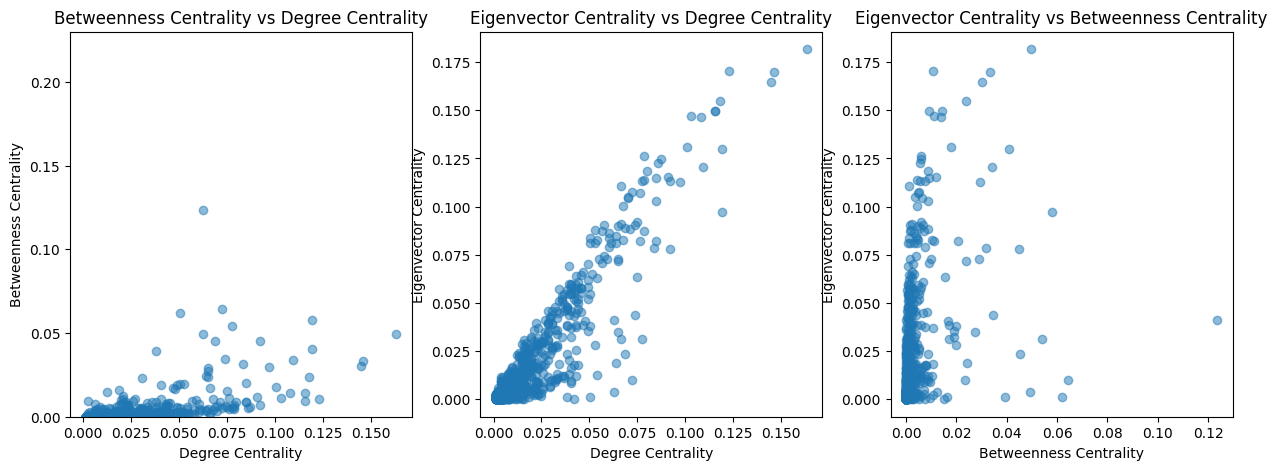

In [115]:
# betweenness centrality vs degree centrality, degree centrality vs eigenvector centrality, and 
# betweenness centrality vs eigenvector centrality
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(list(degree_centrality.values()), list(betweenness_centrality.values()), alpha=0.5)
plt.ylim(0, 0.23)
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality vs Degree Centrality')

plt.subplot(1, 3, 2)
plt.scatter(list(degree_centrality.values()), list(eigenvector_centrality.values()), alpha=0.5)
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality vs Degree Centrality')

plt.subplot(1, 3, 3)
plt.scatter(list(betweenness_centrality.values()), list(eigenvector_centrality.values()), alpha=0.5)
plt.xlabel('Betweenness Centrality')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality vs Betweenness Centrality')
plt.axes
plt.show()

In [116]:
# degree assortativity for the graph
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree assortativity coefficient: {degree_assortativity:.4f}")

# attribute assortativity for 'popularity'
attribute_assortativity = nx.attribute_assortativity_coefficient(G, 'popularity')
print(f"Attribute assortativity for 'popularity': {attribute_assortativity:.4f}")

Degree assortativity coefficient: 0.0747
Attribute assortativity for 'popularity': 0.0029


Artist Network:
Average Shortest Path Length: 3.1865

Random Network:
Average Shortest Path Length: 2.7395


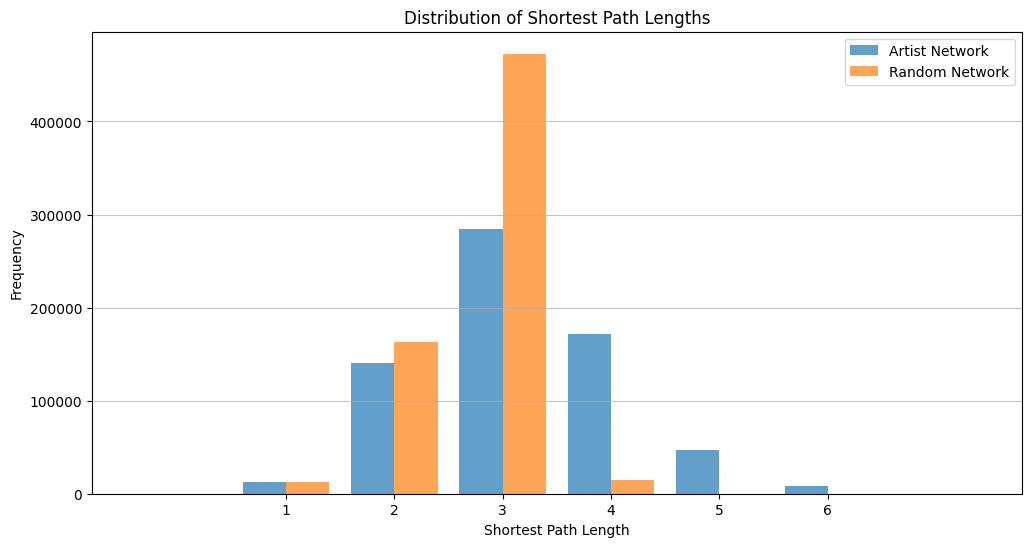

In [117]:
# average shortest path length vs a random graph
N = G.number_of_nodes()
L = G.number_of_edges()

avg_shortest_path_real = nx.average_shortest_path_length(G)
print(f"Artist Network:")
print(f"Average Shortest Path Length: {avg_shortest_path_real:.4f}")

# random Erdos-Renyi graph with the same number of nodes and edges
ER = nx.gnm_random_graph(N, L)
if not nx.is_connected(ER):
    largest_cc_random = max(nx.connected_components(ER), key=len)
    ER_conn = ER.subgraph(largest_cc_random).copy()
else:
    ER_conn = ER.copy()

avg_shortest_path_random = nx.average_shortest_path_length(ER_conn)
print(f"\nRandom Network:")
print(f"Average Shortest Path Length: {avg_shortest_path_random:.4f}")

paths_real = [l for l_dict in dict(nx.all_pairs_shortest_path_length(G)).values() for l in l_dict.values() if l > 0]
paths_random = [l for l_dict in dict(nx.all_pairs_shortest_path_length(ER_conn)).values() for l in l_dict.values() if l > 0]

# plot
max_len = max(max(paths_real), max(paths_random))
bins = np.arange(max_len + 2) - 0.5
hist_real, bin_edges_real = np.histogram(paths_real, bins=bins)
hist_random, bin_edges_random = np.histogram(paths_random, bins=bins)
plt.figure(figsize=(12, 6))
width = 0.4
bin_centers = bin_edges_real[:-1] + 0.5
plt.bar(bin_centers - width/2, hist_real, width=width, alpha=0.7, label='Artist Network')
plt.bar(bin_centers + width/2, hist_random, width=width, alpha=0.7, label='Random Network')
plt.title('Distribution of Shortest Path Lengths')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(np.arange(1, max_len))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Plotting

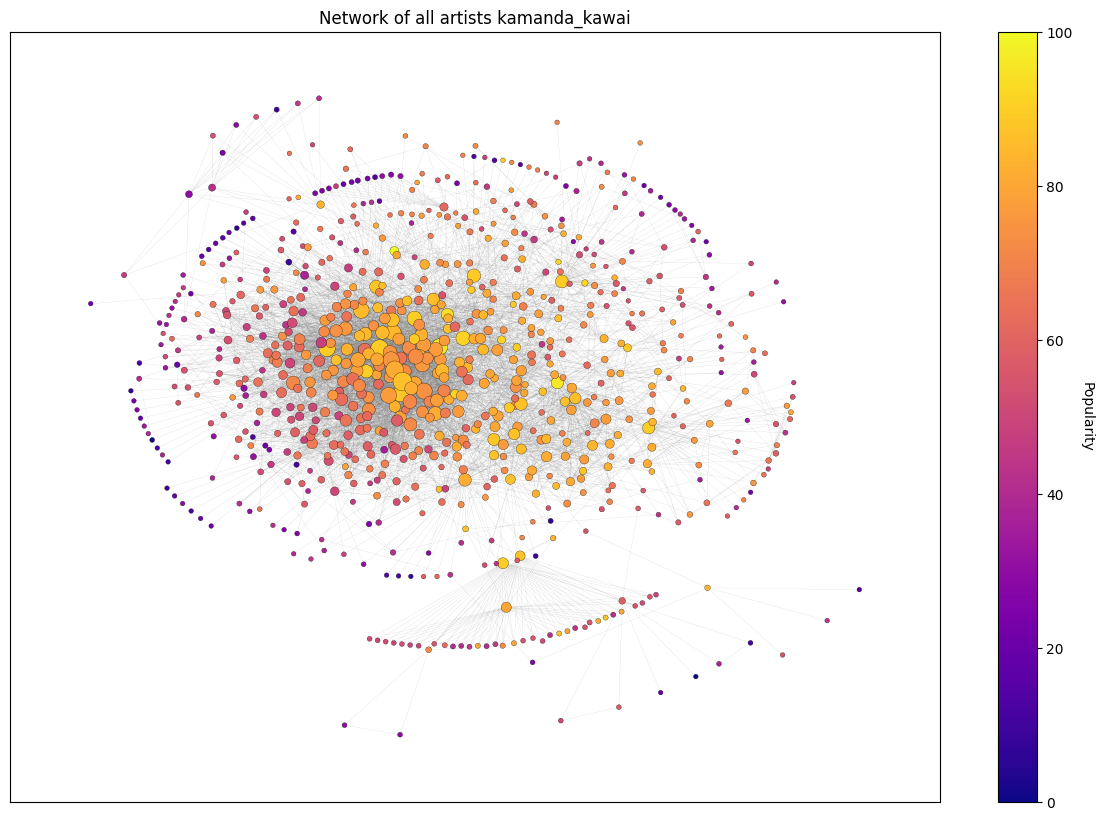

In [118]:
# kamnada_kawai layout
plt.figure(figsize=(15, 10))
plt.title("Network of all artists kamanda_kawai")
pos = nx.kamada_kawai_layout(G)
node_sizes = [10 + (d * 1.3) for d in degrees]
nodes_drawn = nx.draw_networkx_nodes(G, pos,
                                     nodelist=nodes,
                                     node_size=node_sizes,
                                     node_color=popularity,
                                     cmap=plt.cm.plasma,
                                     edgecolors='black',
                                     linewidths=0.2)

nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.6, edge_color='gray')
cbar = plt.colorbar(nodes_drawn)
cbar.set_label('Popularity', rotation=270, labelpad=15)
plt.show()

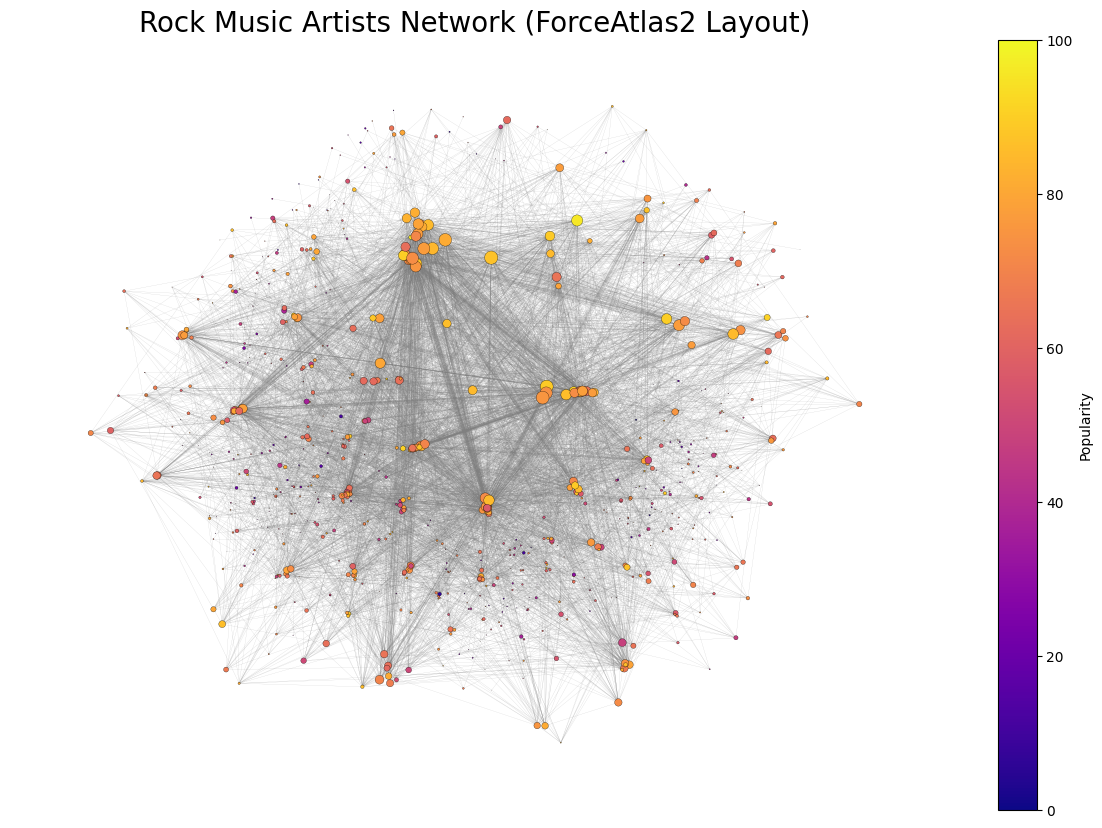

In [154]:
node_sizes_dic = {node: 10 + (G.degree(node) * 1.3) for node in G.nodes()}
pos = nx.forceatlas2_layout(G, node_size=node_sizes_dic, distributed_action=True, dissuade_hubs=True)

plt.figure(figsize=(15, 10))
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=popularity,
    cmap=plt.cm.plasma,
    edgecolors='black',
    linewidths=0.2
)
nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.6, edge_color='gray')
plt.title("Rock Music Artists Network (ForceAtlas2 Layout)", fontsize=20)
cbar = plt.colorbar(nodes)
cbar.set_label("Popularity")
plt.axis('off')
plt.show()

### Testing Plotly graph

In [183]:
import plotly.graph_objects as go

node_sizes_dic = {node: 3 + (G.degree(node) * 0.2) for node in G.nodes()}
pos = nx.forceatlas2_layout(G, node_size=node_sizes_dic, gravity=2, distributed_action=True)

# 1. Create Edge Trace
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.2, color='rgba(150, 150, 150, 0.3)'),
    hoverinfo='none',
    mode='lines',
    )

# 2. Create Node Trace
node_x = []
node_y = []
node_text = []
node_sizes_list = []
node_colors_list = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    
    # Data for styling and hover
    pop = G.nodes[node]['popularity']
    deg = G.degree(node)
    
    node_text.append(f"Artist: {node}<br>Popularity: {pop}<br>Degree: {deg}")
    node_colors_list.append(pop)
    node_sizes_list.append(3 + (deg * 0.2))

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='Plasma', # Matches plt.cm.plasma
        color=node_colors_list,
        size=node_sizes_list,
        colorbar=dict(
            thickness=15,
            title=dict(
                text='Popularity',
                side='right'
            ),
            xanchor='left'
        ),
        line_width=1, # Edge border width
        line_color='black' # Edge border color
    )
)

# 3. Create Figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title=dict(
                    text='Rock Music Artists Network (ForceAtlas2 Layout)',
                    font=dict(size=20)
                ),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                width=1000,
                height=800
             ))

fig.show()

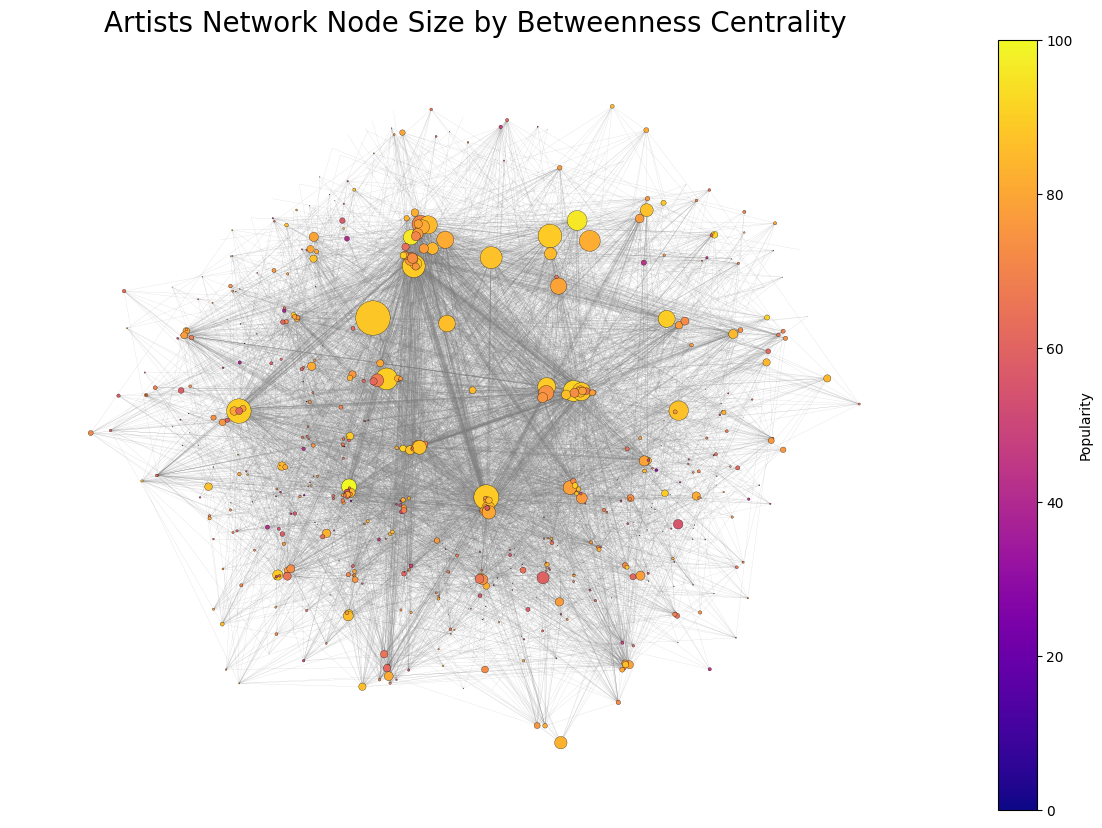

In [155]:
# node size depends on betweenness centrality
node_sizes = [d * 5000 for d in betweenness_centrality.values()]
plt.figure(figsize=(15, 10))
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=popularity,
    cmap=plt.cm.plasma,
    edgecolors='black',
    linewidths=0.2
)
nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.6, edge_color='gray')
plt.title("Artists Network Node Size by Betweenness Centrality", fontsize=20)
cbar = plt.colorbar(nodes)
cbar.set_label("Popularity")
plt.axis('off')
plt.show()

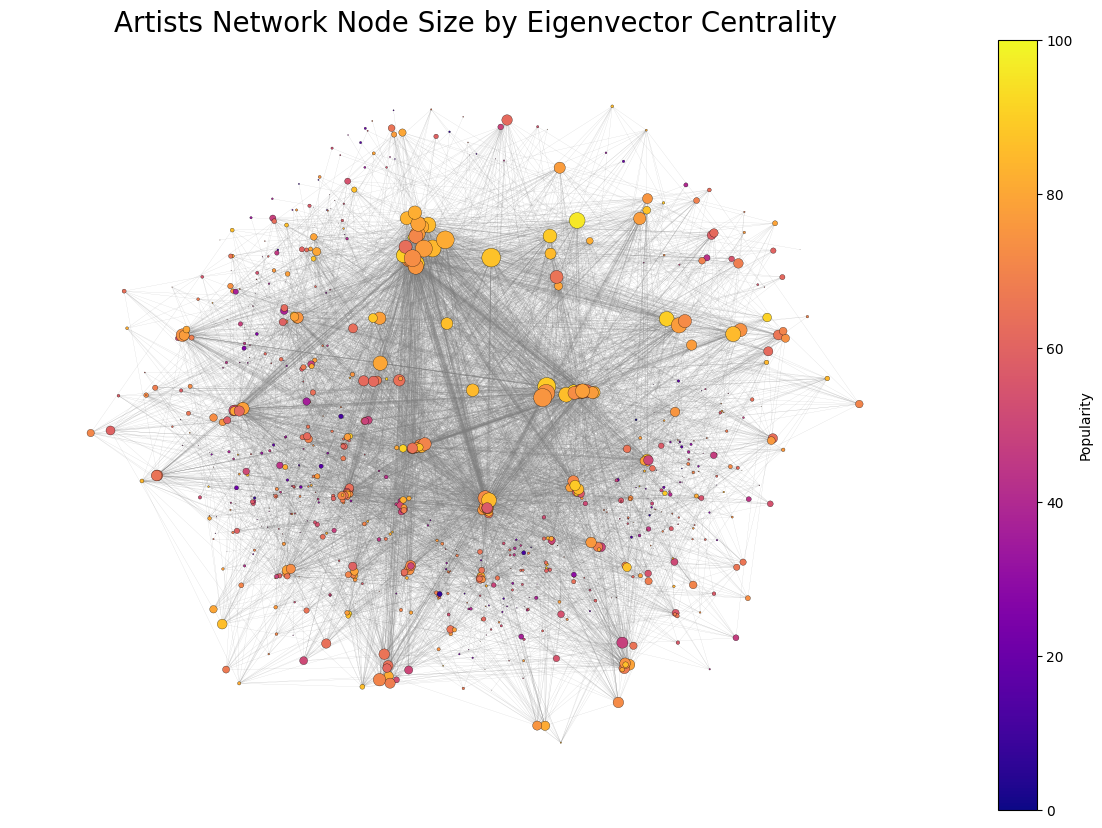

In [158]:
# node size depends on in edge eigenvector centrality
node_sizes = [d * 1000 for d in eigenvector_centrality.values()]
plt.figure(figsize=(15, 10))
nodes = nx.draw_networkx_nodes(
    G,
    pos,
    node_size=node_sizes,
    node_color=popularity,
    cmap=plt.cm.plasma,
    edgecolors='black',
    linewidths=0.2
)
nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.6, edge_color='gray')
plt.title("Artists Network Node Size by Eigenvector Centrality", fontsize=20)
cbar = plt.colorbar(nodes)
cbar.set_label("Popularity")
plt.axis('off')
plt.show()

Calculating DF score...
Calculating DF score...


Backbone 1 (Disparity Filter on High Betweenness): 326 nodes, 250 edges
Backbone 2 (Disparity Filter on Low Betweenness): 438 nodes, 420 edges


Calculating HSS score...


Backbone 3 (High-Salience Skeleton): 276 nodes, 250 edges


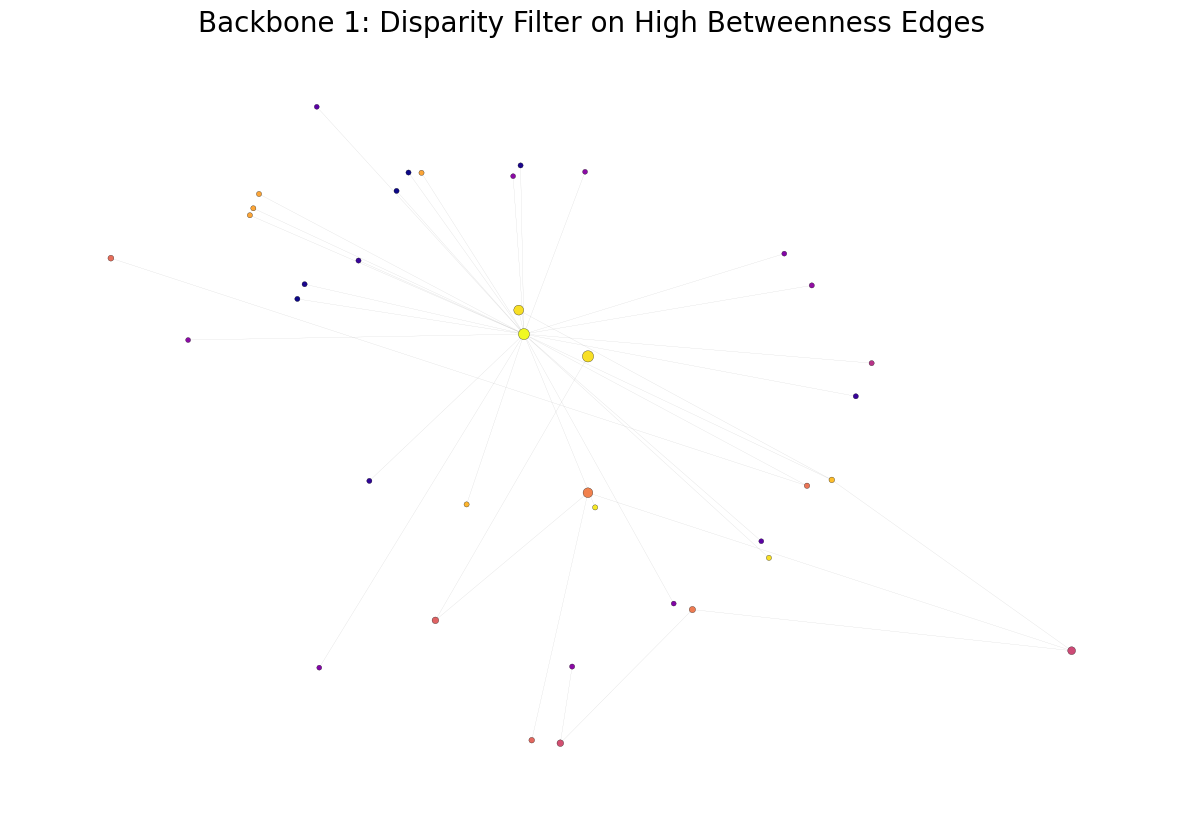

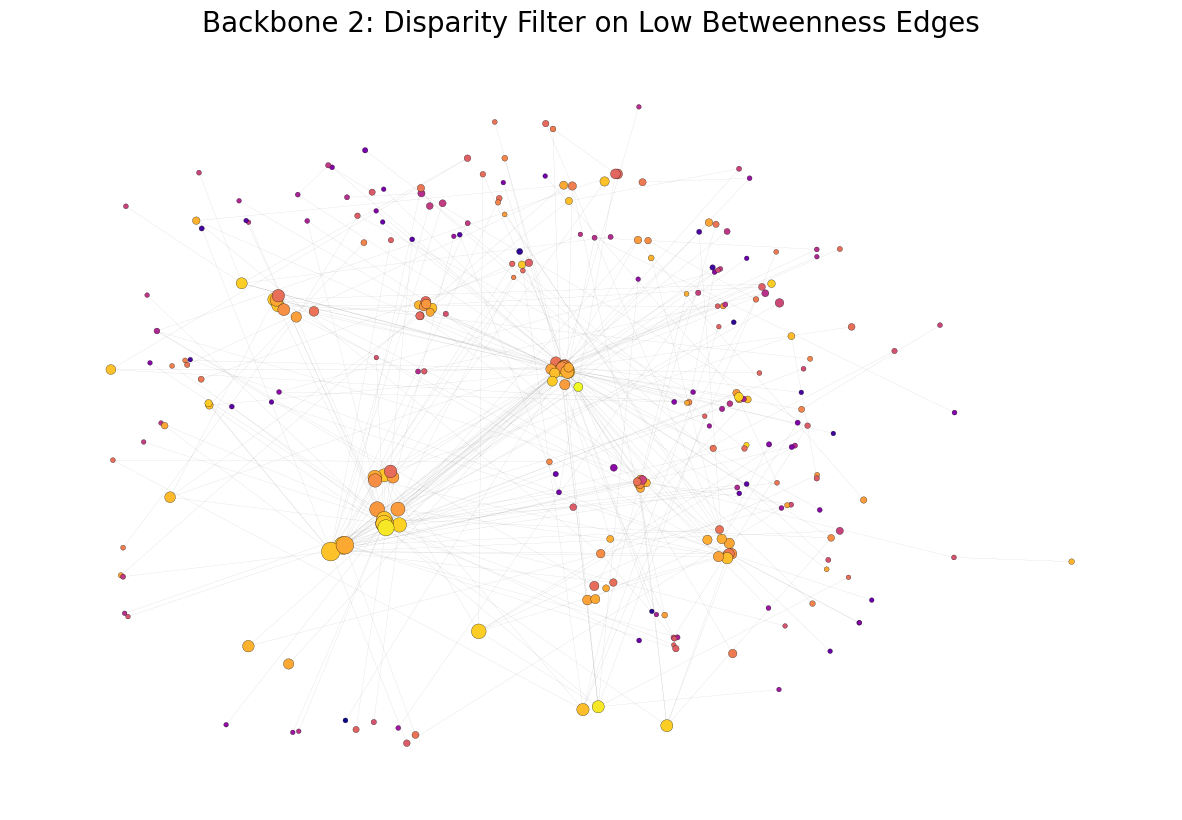

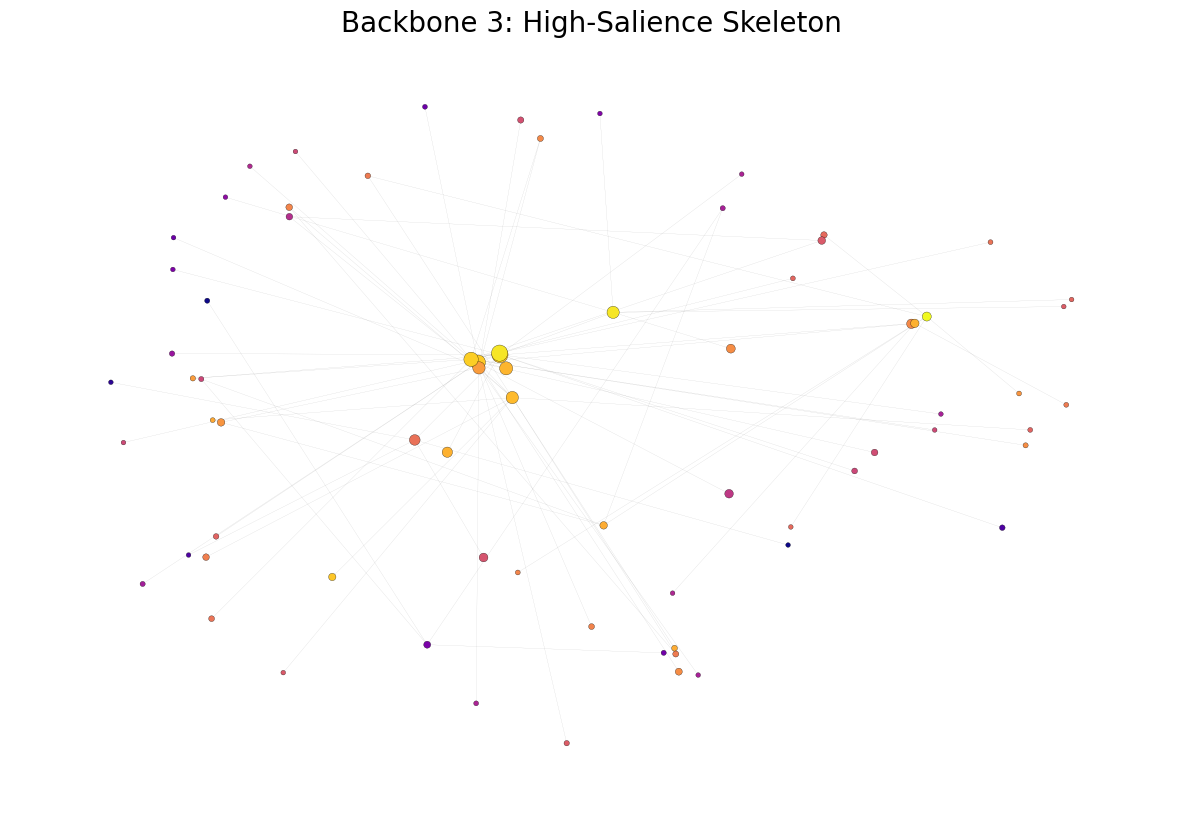

In [ ]:
edge_betweenness = nx.edge_betweenness_centrality(G)

# weighted network 1
G_w1 = G.copy()

# scale in range [1, 100]
eb_values = list(edge_betweenness.values())
min_val = min(eb_values)
max_val = max(eb_values)
val_range = max_val - min_val
new_min = 1
new_max = 100
new_range = new_max - new_min
scaled_weights = [((x - min_val) / val_range) * new_range + new_min for x in eb_values]

for i, edge in enumerate(edge_betweenness.keys()):
    G_w1.edges[edge]['weight'] = scaled_weights[i]

# weighted network 2
G_w2 = G.copy()
for i, edge in enumerate(edge_betweenness.keys()):
    G_w2.edges[edge]['weight'] = 1 / scaled_weights[i]

# extract backbones 
# library expects columns 'src', 'trg', and 'nij' (weight)
table_w1 = nx.to_pandas_edgelist(G_w1, source='src', target='trg')
table_w1.rename(columns={'weight': 'nij'}, inplace=True)

table_w2 = nx.to_pandas_edgelist(G_w2, source='src', target='trg')
table_w2.rename(columns={'weight': 'nij'}, inplace=True)

# weighted network 3
G_undirected_w = G.copy()
nx.set_edge_attributes(G_undirected_w, 1, 'weight')
table_undirected = nx.to_pandas_edgelist(G_undirected_w, source='src', target='trg')
table_undirected.rename(columns={'weight': 'nij'}, inplace=True)

# the alpha parameter for the first two backbones 
alpha = 0.4

# backbone network 1 
df_backbone1 = bb.disparity_filter(table_w1, undirected=True)
backbone_1_table = df_backbone1[df_backbone1['score'] < alpha]
backbone_1 = nx.from_pandas_edgelist(backbone_1_table, 'src', 'trg', create_using=nx.Graph())
print(f"Backbone 1 (Disparity Filter on High Betweenness): {backbone_1.number_of_nodes()} nodes, {backbone_1.number_of_edges()} edges")

# backbone network 2
df_backbone2 = bb.disparity_filter(table_w2, undirected=True)
backbone_2_table = df_backbone2[df_backbone2['score'] < alpha]
backbone_2 = nx.from_pandas_edgelist(backbone_2_table, 'src', 'trg', create_using=nx.Graph())
print(f"Backbone 2 (Disparity Filter on Low Betweenness): {backbone_2.number_of_nodes()} nodes, {backbone_2.number_of_edges()} edges")

# backbone network 3
# identifies the most 'salient' paths in the network
df_backbone3 = bb.high_salience_skeleton(table_undirected, undirected=True)
top_n_edges = backbone_1.number_of_edges()
backbone_3_table = df_backbone3.nlargest(top_n_edges, 'score')
backbone_3 = nx.from_pandas_edgelist(backbone_3_table, 'src', 'trg', create_using=nx.Graph())
print(f"Backbone 3 (High-Salience Skeleton): {backbone_3.number_of_nodes()} nodes, {backbone_3.number_of_edges()} edges")


# plot the backbones
original_degrees = dict(G.degree())

def plot_backbone(graph, title, original_degrees_dict):    
    if not nx.is_connected(graph):
        largest_cc = max(nx.connected_components(graph), key=len)
        plot_graph = graph.subgraph(largest_cc)
    else:
        plot_graph = graph


    # CHOOSE EITHER ALGORITHM
    # 1
    # Manually call the core forceatlas2 function to avoid the deprecated wrapper
    node_sizes_dic = {node: 10 + original_degrees_dict[node] * 1.3 for node in plot_graph.nodes()}
    pos_backbone = nx.forceatlas2_layout(G, node_size=node_sizes_dic, gravity=0.1)
    # 2
    # pos_array = forceatlas2.forceatlas2(nx.to_numpy_array(plot_graph), gravity=0.1)
    # pos_backbone = {node: pos_array[i] for i, node in enumerate(plot_graph.nodes())}

    node_sizes = [10 + original_degrees_dict[node] * 1.3 for node in plot_graph.nodes()]
    popularity = [G.nodes[node]['popularity'] for node in plot_graph.nodes()]

    plt.figure(figsize=(15, 10))
    nx.draw_networkx_nodes(
        plot_graph,
        pos_backbone,
        node_size=node_sizes,
        node_color=popularity,
        cmap=plt.cm.plasma,
        edgecolors='black',
        linewidths=0.2
    )
    nx.draw_networkx_edges(plot_graph, pos_backbone,  width=0.1, alpha=0.6, edge_color='gray')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

plot_backbone(backbone_1, "Backbone 1: Disparity Filter on High Betweenness Edges", original_degrees)
plot_backbone(backbone_2, "Backbone 2: Disparity Filter on Low Betweenness Edges", original_degrees)
plot_backbone(backbone_3, "Backbone 3: High-Salience Skeleton", original_degrees)

## Communities

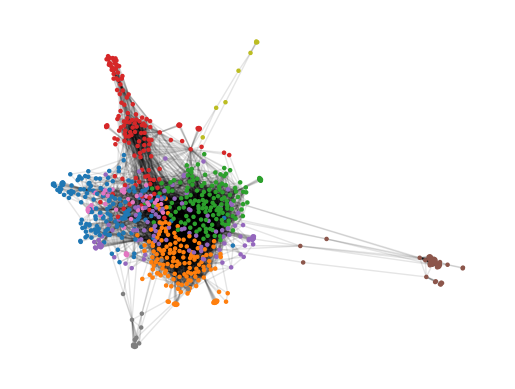

In [165]:
pos_array = forceatlas2.forceatlas2(nx.to_numpy_array(G))
pos_subgraph = {node: pos_array[i] for i, node in enumerate(G.nodes())}

sorted_communities = sorted(nx_comm.louvain_communities(G), key=len, reverse=True)
top_n = len(sorted_communities)

node_to_community = {}
for i, comm in enumerate(sorted_communities):
    for node in comm:
        node_to_community[node] = i


top_n += 1
cmap = plt.colormaps.get_cmap('tab10')
colors = [cmap(i / top_n) for i in range(top_n)]

node_colors = []
for node in G.nodes():
    community_index = node_to_community.get(node, -1)
    if community_index != -1 and community_index <= top_n:
        node_colors.append(colors[community_index])
    else:
        node_colors.append('lightgray')

nx.draw_networkx_edges(G, pos_subgraph, alpha=0.1)
nx.draw_networkx_nodes(G, pos_subgraph, node_color=node_colors, node_size=5)
plt.axis('off')
plt.show()